In [83]:
import pickle,glob,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [4]:
%matplotlib inline

In [144]:
listeMSP=sorted(glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/*X-paradigmes.csv"))
listeOMP=sorted(glob.glob("/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/*-Morphomes-paradigmes.csv"))

In [3]:
def tiragesNom(nom,listeTirages):
    result=[tirage for tirage in listeTirages if nom in tirage]
    return sorted(result)

In [79]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_palette("husl")

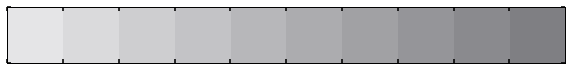

In [6]:
grayScalePalette=sns.cubehelix_palette(10, hue=0.05, rot=0, light=0.9, dark=0.5)
sns.palplot(grayScalePalette)

In [32]:
def lireEchantillon(nom):
    df=pd.read_csv(nom,sep=";",index_col="lexeme")
    df.drop(labels="Unnamed: 0",axis=1,inplace=True)
    return df

In [9]:
bounds = np.array([0, 1, 3, 10, 30, 100, 300, 1000])
norm = plt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

In [10]:
freqSortedCases=[u'pi3S', u'inf', u'ppMS', u'pi1S', u'ii3S', u'pi2S', u'pi2P', u'ai3S', u'pi3P', u'ppFS', 
                 u'ii1S', u'pP', u'ii3P', u'ppMP', u'fi3S', u'pc3S', u'pi1P', u'ps3S', u'fi1S', u'pc1S', 
                 u'ppFP', u'pI2P', u'ai1S', u'pI2S', u'ai3P', u'fi2S', u'ii1P', u'fi2P', u'ii2P', u'fi3P', 
                 u'is3S', u'fi1P', u'pc3P', u'pc2P', u'ps2S', u'pI1P', u'ps3P', u'pc2S', u'pc1P', u'ai1P', 
                 u'ii2S', u'ps2P', u'is3P', u'ai2S', u'ps1P', u'is1S', u'ai2P', u'ps1S', u'is1P', u'is2S', 
                 u'is2P']

In [57]:
def getTokens(name):
    m=re.search(ur"\d+-T(\d+)-F\d+",name)
    if m:
        return int(m.group(1))
    else:
        print "no Tokens"
        return None

In [73]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

In [179]:
def setSeries(df):
    for i in range(df.index.max()):
        if not i+1 in df.index:
            df[i+1]=0
    return df.sort_index()

In [184]:
def getCoforms(df):
    dfCoforms=df.apply(lambda x: x.count(), axis=1)
    mean=dfCoforms.mean()
    dist=setSeries(dfCoforms.groupby(dfCoforms).count())
    return mean,dist

In [185]:
dictIsolatedCellForms={}
dictCoforms={}
dictDist={}
for MSP in listeMSP[:]:
    df=lireEchantillon(MSP)
    tokens=getTokens(MSP)
    dictIsolatedCellForms[tokens]=len(df)-len(df.dropna(thresh=2))
    mean,dist=getCoforms(df)
    dictCoforms[tokens]=mean
    dictDist[tokens]=dist

In [186]:
dist

1     465
2     345
3     279
4     261
5     247
6     260
7     224
8     240
9     232
10    234
11    210
12    188
13    187
14    172
15    137
16    136
17    125
18     88
19     94
20     97
21     76
22     78
23     70
24     59
25     54
26     58
27     51
28     52
29     55
30     57
31     47
32     34
33     48
34     36
35     33
36     38
37     38
38     33
39     16
40     19
41     18
42     15
43     12
44      8
45      8
46      5
47      0
48      3
49      0
50      1
dtype: int64

In [165]:
etapes=[2000000,8000000,30000000,130000000]

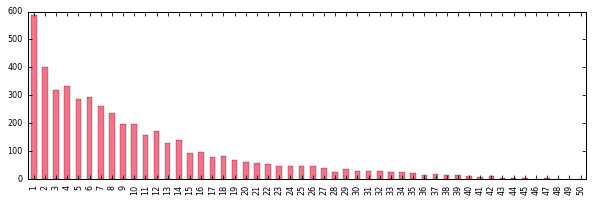

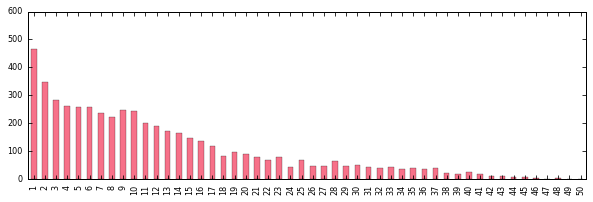

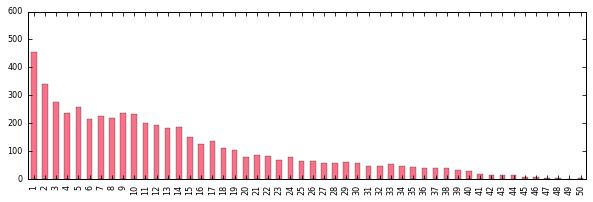

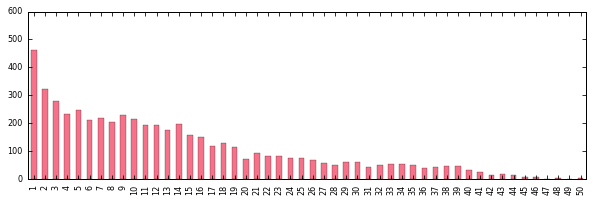

In [194]:
for etape in etapes:
    ax=dictDist[etape].plot(kind="bar",figsize=(10,3),label="Lexemes by number of co-forms")
    ax.set_ylim(0,600)
    plt.show()

In [91]:
dfIsolatedCelleForms=pd.Series(data=dictIsolatedCellForms)
dfIsolatedCelleForms.min()

452

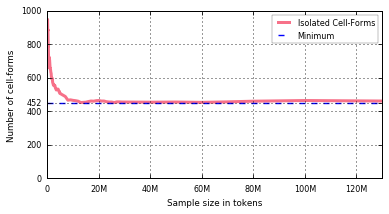

In [102]:
ax=dfIsolatedCelleForms.plot(figsize=(6,3),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of cell-forms")#,fontsize=16)
ax.set_ylim(0,1000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(452,linestyle="--",label="Minimum")
plt.yticks(list(plt.yticks()[0]) + [452])
handles, labels = ax.get_legend_handles_labels()
labels=["Isolated Cell-Forms", "Minimum"]
ax.legend(handles, labels)
plt.grid()
plt.savefig("Hapax.png",dpi=300, bbox_inches="tight")

In [96]:
dictIsolatedCellFormsOMP={}
for OMP in listeOMP[:]:
    df=lireEchantillon(OMP)
    dictIsolatedCellFormsOMP[getTokens(OMP)]=len(df)-len(df.dropna(thresh=2))

In [97]:
dfIsolatedCelleFormsOMP=pd.Series(data=dictIsolatedCellFormsOMP)
dfIsolatedCelleFormsOMP.min()

474

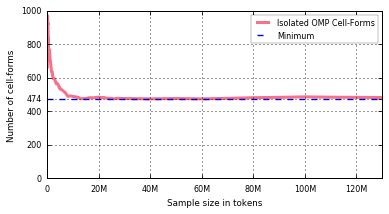

In [119]:
ax=dfIsolatedCelleFormsOMP.plot(figsize=(6,3),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of cell-forms")#,fontsize=16)
ax.set_ylim(0,1000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(474,linestyle="--",label="Minimum")
plt.yticks(list(plt.yticks()[0]) + [474])
handles, labels = ax.get_legend_handles_labels()
labels=["Isolated OMP Cell-Forms", "Minimum"]
ax.legend(handles, labels)
plt.grid()
plt.savefig("HapaxOMP.png",dpi=300, bbox_inches="tight")

In [106]:
dfCoforms=pd.Series(data=dictCoforms)
dfCoforms

10000         2.840186
20000         3.283051
30000         3.666667
40000         3.896582
50000         4.115652
60000         4.325635
70000         4.494287
80000         4.643110
90000         4.794188
100000        4.921088
110000        5.028691
120000        5.142948
130000        5.262667
140000        5.375765
150000        5.463568
160000        5.553751
170000        5.652936
180000        5.732143
190000        5.816885
200000        5.872994
210000        5.954583
220000        6.027295
230000        6.086719
240000        6.148568
250000        6.205300
260000        6.283665
270000        6.335263
280000        6.401047
290000        6.461899
300000        6.514205
               ...    
11000000     12.508658
12000000     12.585978
13000000     12.661352
14000000     12.717643
15000000     12.767702
16000000     12.807147
17000000     12.844381
18000000     12.876958
19000000     12.904807
20000000     12.930522
21000000     12.950339
22000000     12.973298
23000000   

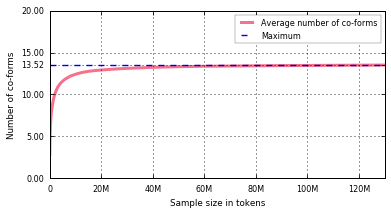

In [118]:
ax=dfCoforms.plot(figsize=(6,3),linewidth=3)
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of co-forms")#,fontsize=16)
ax.set_ylim(0,19)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(13.52,linestyle="--",label="Minimum")
plt.yticks(list(plt.yticks()[0]) + [13.52])
handles, labels = ax.get_legend_handles_labels()
labels=["Average number of co-forms", "Maximum"]
ax.legend(handles, labels)
plt.grid()
plt.savefig("MeanNbForms.png",dpi=300, bbox_inches="tight")